## `Classification`

### `Importing Libraries`

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from torch import nn

## `Data Generation`

In [ ]:
### 1000 samples
n_samples = 1000
### creating dataset with added noise
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First five samples of X:\n {X[:5]}")
print(f"First five samples of y:\n {y[:5]}")

First five samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:
 [1 1 1 1 0]


In [ ]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.columns

Index(['X0', 'X1', 'label'], dtype='object')

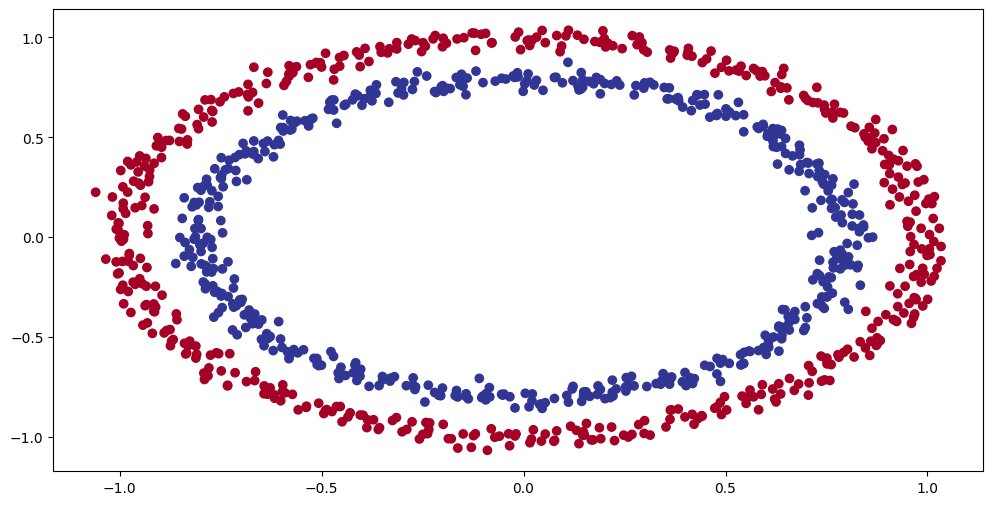

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
torch.__version__

'2.4.0+cu121'

### `Device Agnostic Code`

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### `Converting our data to Tensors`

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

### `split data`

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn

## device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    ## create two nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5)  ## first layer /hidden layer
    self.layer_2 = nn.Linear(in_features=5, out_features=1)  ## output layer/ same shape as y
  ### input feature of layer 2 is same as output feature of layer 1
  ## defining forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(X)) ## x -> layer_1 -> layer_2 -> output

##  creating an instance of our model
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.3365, -0.1916],
        [ 0.5194,  0.0656],
        [ 0.1252,  0.6766],
        [ 0.5480,  0.6934],
        [-0.1987, -0.2482]], requires_grad=True)

In [ ]:
### replicating above model using nn.Sequential()
model_01 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_01

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# class CircleModelV0(nn.Module):
#   def __init__(self):
#     super().__init__()
#     ## create two nn.Linear layers
#     self.layer_1 = nn.Linear(in_features=2, out_features=5)  ## first layer /hidden layer
#     self.layer_2 = nn.Linear(in_features=5, out_features=1)  ## output layer/ same shape as y
#   ### input feature of layer 2 is same as output feature of layer 1
#   ## defining forward pass
#     self.two_layer = nn.Sequential(
#        nn.Linear(in_features=2, out_features=5),
#        nn.Linear(in_features=5, out_features=1)
#     )
#   def forward(self,x):
#   #   return self.layer_2(self.layer_1(X)) ## x -> layer_1 -> layer_2 -> output
#     return self.two_layer(x)
# ##  creating an instance of our model
# model_02 = CircleModelV0().to(device)
# model_02

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3365, -0.1916],
                      [ 0.5194,  0.0656],
                      [ 0.1252,  0.6766],
                      [ 0.5480,  0.6934],
                      [-0.1987, -0.2482]])),
             ('layer_1.bias',
              tensor([0.5475, 0.7058, 0.0939, 0.0999, 0.3135])),
             ('layer_2.weight',
              tensor([[-0.2543, -0.4101, -0.1876, -0.4426,  0.2796]])),
             ('layer_2.bias', tensor([-0.2186]))])

In [ ]:
model_01.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2138,  0.0263],
                      [ 0.1883,  0.0429],
                      [-0.3092,  0.2258],
                      [ 0.2110, -0.5847],
                      [-0.1600,  0.2572]])),
             ('0.bias', tensor([-0.3691,  0.5009,  0.3315,  0.4882,  0.2810])),
             ('1.weight',
              tensor([[ 0.3172,  0.1063,  0.0332, -0.0218, -0.3968]])),
             ('1.bias', tensor([-0.0564]))])

In [ ]:
# model_02.state_dict()

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds

tensor([[-1.2006e+00],
        [-2.2624e-01],
        [-1.9914e-01],
        [-7.1077e-01],
        [-4.6405e-01],
        [-6.4957e-01],
        [-9.9967e-01],
        [-1.1711e+00],
        [-1.3449e-01],
        [-1.0378e+00],
        [ 3.8941e-02],
        [-1.3813e+00],
        [-9.4862e-01],
        [-9.1635e-01],
        [-7.1127e-01],
        [-3.7194e-01],
        [ 1.2497e-01],
        [-3.0607e-01],
        [-6.4631e-02],
        [ 1.3558e-01],
        [-1.2268e+00],
        [-6.8367e-01],
        [-1.2868e-01],
        [-1.2142e+00],
        [-2.7775e-01],
        [-1.3632e-01],
        [-1.2708e+00],
        [-1.0601e+00],
        [-4.0750e-01],
        [-8.0562e-01],
        [ 9.0056e-03],
        [-9.6051e-01],
        [-1.0039e+00],
        [-1.2508e+00],
        [-5.1939e-02],
        [-4.6317e-01],
        [-5.4372e-01],
        [-1.2427e+00],
        [-4.2638e-01],
        [-1.3921e+00],
        [ 1.2146e-01],
        [-1.2971e+00],
        [ 1.4848e-01],
        [-1

In [ ]:
torch.round(untrained_preds[:10]) , y_test[:10]

(tensor([[-1.],
         [-0.],
         [-0.],
         [-1.],
         [-0.],
         [-1.],
         [-1.],
         [-1.],
         [-0.],
         [-1.]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
### loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()  ## combines bce with sigmoid loss, more numerically stable
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
## accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3365, -0.1916],
                      [ 0.5194,  0.0656],
                      [ 0.1252,  0.6766],
                      [ 0.5480,  0.6934],
                      [-0.1987, -0.2482]])),
             ('layer_1.bias',
              tensor([0.5475, 0.7058, 0.0939, 0.0999, 0.3135])),
             ('layer_2.weight',
              tensor([[-0.2543, -0.4101, -0.1876, -0.4426,  0.2796]])),
             ('layer_2.bias', tensor([-0.2186]))])

In [ ]:
### train model
model_01.eval()
with torch.inference_mode():
  y_logits = model_01(X_test.to(device))[:5]
y_logits

tensor([[-0.3297],
        [-0.2955],
        [-0.3057],
        [-0.3370],
        [-0.1253]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
### using sigmoid as our activation function
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.4183],
        [0.4267],
        [0.4242],
        [0.4165],
        [0.4687]])

In [ ]:
y_preds = torch.round(y_preds_probs)

In [ ]:
y_pred_labels = torch.round(torch.sigmoid(model_01(X_test.to(device))[:5]))

In [ ]:
## check for equality
torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())

tensor([True, True, True, True, True])

In [ ]:
y_preds.squeeze()

tensor([0., 0., 0., 0., 0.])

In [ ]:
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
torch.manual_seed(67)
## torch.cuda.manual_seed(98)
epochs = 100
## put data into target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## building training and evaluation loop
for epoch in range(epochs):
  ### training
  model_01.train()

  ## forward pass
  y_logits = model_01(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  ## loss and accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),y_train) ## nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits, y_train) ## nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  ## optimizer zero grad
  optimizer.zero_grad()

  ## loss backward
  loss.backward()

  ## optimizer step
  optimizer.step()

  ## testing
  model_01.eval()
  with torch.inference_mode():
    ## forward pass
    test_logits = model_01(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    ## calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 30 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 40 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 50 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 70 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 80 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.70103 | Acc: 50.00% | Test Loss: 0.70110 | Test Acc: 50.00%
